In [ ]:
#OmSriGaneshayaNamah
#OmSriSaraswatyaiNamah
#OmSriSaiRam

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
yelp = pd.read_csv(r'C:\Users\TOSHIBA\Desktop\Udemy\Refactored_Py_DS_ML_Bootcamp-master\20-Natural-Language-Processing\yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.shape

(10000, 10)

In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [4]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [5]:
#length of text
yelp['text_len'] = yelp.text.apply(len)

In [8]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_len
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [12]:
yelp['text'][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [9]:
#EXPLORATORY DATA ANALYSIS
#set the style for seaborn library
sns.set_style('white')

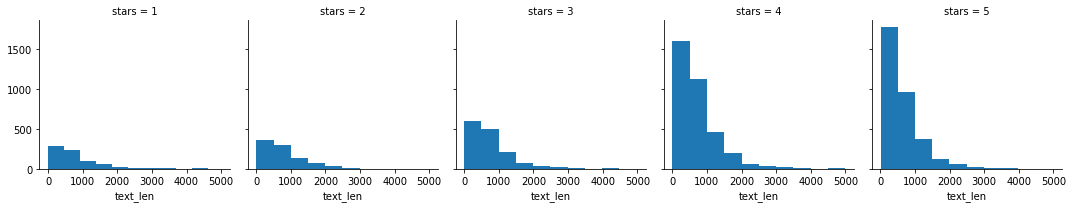

In [6]:
#use facetgrid from seaborn libeary to create 5 histograms of text length based off of the star ratings
#set facet grid
#histogram 
g = sns.FacetGrid(yelp, col='stars')
g.map(plt.hist, 'text_len')

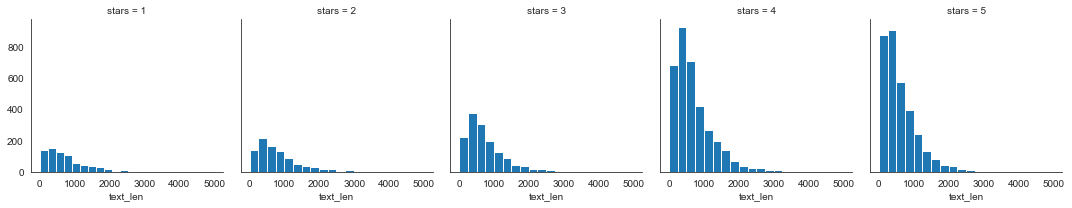

In [18]:
g = sns.FacetGrid(yelp, col='stars')
g.map(plt.hist, 'text_len', bins=20)

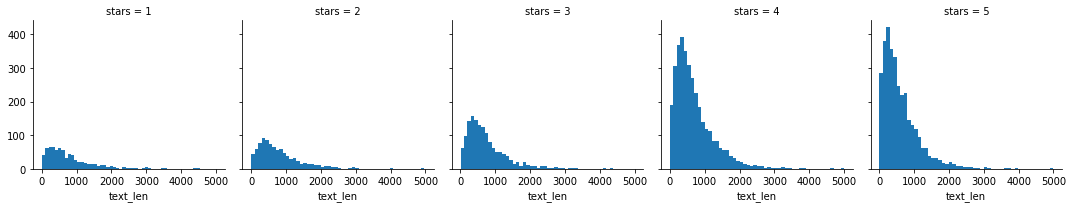

In [7]:
g = sns.FacetGrid(yelp, col='stars')
g.map(plt.hist, 'text_len', bins=50)

In [ ]:
#It seems like the distribution of text length seems to be the same for all the number of stars
#It seems the actuall amount of text reviews seems to be a lot higher towards 4 and 5 stars
#This may cause some issue as we go along throughout this process

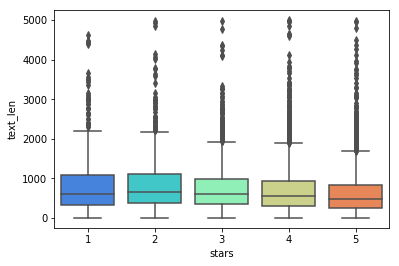

In [8]:
#boxplot b/w text length of each star category
sns.boxplot(x='stars', y='text_len', data=yelp, palette='rainbow')

In [22]:
#The resulting plot shows that 1 to 2 text stars have moderately higher length, but there are somany outliers that this may not be a useful feature

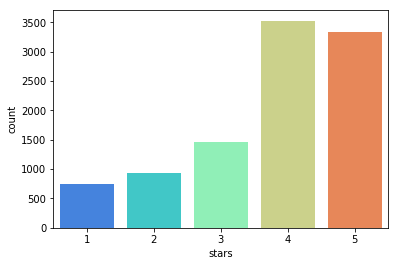

In [9]:
#countplot of the number of occurences for each type of star rating
sns.countplot(x='stars', data=yelp, palette='rainbow')

In [10]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_len
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [11]:
#Create new dataframe by grouping stars - groupby to get the mean values of the numerical columns
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text_len
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [12]:
#find correlation - corr() method on star dataset to produce dataframe
stars.corr()

,cool,useful,funny,text_len
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_len,-0.857664,0.699881,0.843461,1.000000


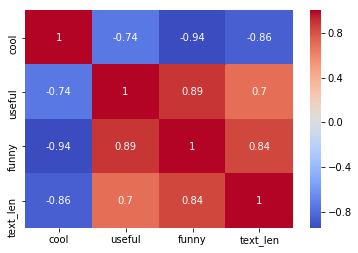

In [13]:
#create heatmap based off of stars correlation
sns.heatmap(stars.corr(),cmap='coolwarm', annot=True)

In [ ]:
#funny is highly correlated to useful, useful is correlated to text-len, negative correlation b/w cool & text_len, funny & useful

In [33]:
yelp.shape

(10000, 11)

In [14]:
#NLP Classification task
#Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only 1 or 5 star reviews
yelp_class = yelp[(yelp['stars']==1) | (yelp['stars']==5)]

In [15]:
yelp_class.shape

(4086, 11)

In [17]:
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
business_id    4086 non-null object
date           4086 non-null object
review_id      4086 non-null object
stars          4086 non-null int64
text           4086 non-null object
type           4086 non-null object
user_id        4086 non-null object
cool           4086 non-null int64
useful         4086 non-null int64
funny          4086 non-null int64
text_len       4086 non-null int64
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [39]:
yelp_class.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_len
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


In [18]:
#create two objects, x and y
#x will be the 'text' column of yelp_class
#y will be the 'stars' column of yelp_class
x = yelp_class['text']
y = yelp_class['stars']

In [41]:
x.head()

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
6    Drop what you're doing and drive here. After I...
Name: text, dtype: object

In [19]:
y.head()

0    5
1    5
3    5
4    5
6    5
Name: stars, dtype: int64

In [20]:
# create CountVectorizer object
from sklearn.feature_extraction.text import CountVectorizer
#assign cv as count vertorizer
cv = CountVectorizer()

In [21]:
#use the fit_transform method on the count vectorizer object & pass in x ('text' column), & save this result by overwriting x.
x = cv.fit_transform(x)

In [22]:
print(x)

  (0, 1508)	1
  (0, 7457)	1
  (0, 17344)	1
  (0, 18432)	1
  (0, 2788)	1
  (0, 1027)	1
  (0, 17346)	1
  (0, 3796)	1
  (0, 10637)	1
  (0, 408)	1
  (0, 2354)	1
  (0, 7664)	1
  (0, 11742)	1
  (0, 12678)	1
  (0, 18826)	2
  (0, 2767)	1
  (0, 4817)	1
  (0, 16913)	1
  (0, 15456)	1
  (0, 18200)	1
  (0, 5723)	1
  (0, 14862)	1
  (0, 17667)	1
  (0, 18698)	1
  (0, 10133)	1
  :	:
  (4085, 13749)	1
  (4085, 19074)	1
  (4085, 9097)	3
  (4085, 783)	1
  (4085, 7635)	1
  (4085, 14727)	1
  (4085, 12765)	2
  (4085, 18575)	1
  (4085, 1329)	1
  (4085, 17121)	1
  (4085, 1152)	1
  (4085, 15740)	1
  (4085, 18432)	1
  (4085, 11742)	2
  (4085, 18826)	1
  (4085, 18663)	2
  (4085, 7007)	1
  (4085, 8853)	1
  (4085, 19066)	1
  (4085, 14998)	1
  (4085, 17134)	1
  (4085, 17126)	5
  (4085, 937)	1
  (4085, 11821)	2
  (4085, 11265)	2


In [46]:
#split the data into train and test
from sklearn.model_selection import train_test_split

In [24]:
#splitting the test data to 30% with randomness 101
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [45]:
#develop multinomial naive bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [26]:
#fit the model
nb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
#predictions & evaluations
#use predict method off of the above nb object
predictions = nb.predict(x_test)

In [44]:
#create confusion matrix and classification report
#import confusion matrix & classification report
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
confusion_matrix(y_test, predictions)

array([[159,  69],
       [ 22, 976]], dtype=int64)

In [30]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

   micro avg       0.93      0.93      0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



In [31]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

   micro avg       0.93      0.93      0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



In [ ]:
#90% accuracy on precision & recall between the 1 & 5 star classes

In [47]:
#let's introduce tfidf pipeline to this process
#tfidf from sklearn
from sklearn.feature_extraction.text import TfidfTransformer

In [48]:
#import Pipeline from sklearn
from sklearn.pipeline import Pipeline

In [49]:
#create pipeline with 1) countvectorizer(), 2) tfidftransfer(), 3) multinomialnb()

pipe = Pipeline([('bow', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

In [35]:
#Remember the pipeline has all the re-process steps in it already, meaning we'll need to re-split the original data
#also remmeber we overwrote the x as the CountVectorizer() version, so in this case we need the original data

In [50]:
#split the original data into train & test
x = yelp_class['text']
y = yelp_class['stars']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [37]:
x_train.shape

(2860,)

In [38]:
y_train.shape

(2860,)

In [51]:
#fit the pipeline to the training data
#pipeline does countvectorizer, tfidf, multnb model
pipe.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...ear_tf=False, use_idf=True)), ('model', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [52]:
#Predictions & evaluations
pipe_pred = pipe.predict(x_test)

In [53]:
confusion_matrix(x_test, pipe_pred)

ValueError: Mix of label input types (string and number)